In [73]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [74]:
df = pd.read_csv("XRPUSDT-8.csv")
df.shape
df.head
df = df.drop('Time',axis=1)
df = df/df.max()
df

,Open,High,Low,Close,Volume
0,0.553487,0.553259,0.555258,0.553420,0.028232
1,0.553412,0.552963,0.553396,0.551491,0.034607
2,0.551409,0.550963,0.551311,0.549933,0.072627
3,0.549926,0.550000,0.551236,0.550898,0.049746
4,0.550742,0.551481,0.552577,0.552307,0.024384
...,...,...,...,...,...
44365,0.888501,0.887259,0.889112,0.886037,0.021668
44366,0.885831,0.884519,0.886282,0.883143,0.030292
44367,0.883309,0.882000,0.883974,0.880991,0.027090
44368,0.880935,0.879778,0.882261,0.880472,0.027203


In [75]:
length = 10

In [76]:
df4 = df[:-length]
df4 = np.array(df4)
for i in range(length-1):
    df2 = df[i+1:i+1-length]
    df2 = np.array(df2)
    df4 = np.concatenate((df4,df2),axis=1)
x = pd.DataFrame(df4)
x

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.553487,0.553259,0.555258,0.553420,0.028232,0.553412,0.552963,0.553396,0.551491,0.034607,...,0.552745,0.552741,0.554885,0.553198,0.006354,0.553116,0.552963,0.554811,0.553569,0.009617
1,0.553412,0.552963,0.553396,0.551491,0.034607,0.551409,0.550963,0.551311,0.549933,0.072627,...,0.553116,0.552963,0.554811,0.553569,0.009617,0.553561,0.554296,0.555407,0.554904,0.012165
2,0.551409,0.550963,0.551311,0.549933,0.072627,0.549926,0.550000,0.551236,0.550898,0.049746,...,0.553561,0.554296,0.555407,0.554904,0.012165,0.554748,0.554222,0.556673,0.554830,0.009613
3,0.549926,0.550000,0.551236,0.550898,0.049746,0.550742,0.551481,0.552577,0.552307,0.024384,...,0.554748,0.554222,0.556673,0.554830,0.009613,0.554822,0.554296,0.555481,0.553495,0.033471
4,0.550742,0.551481,0.552577,0.552307,0.024384,0.552300,0.552370,0.554290,0.553124,0.036667,...,0.554822,0.554296,0.555481,0.553495,0.033471,0.553412,0.553333,0.555481,0.553643,0.009533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44355,0.884347,0.884222,0.885761,0.884033,0.030506,0.883976,0.883407,0.886580,0.884033,0.013269,...,0.883457,0.884593,0.886655,0.886037,0.015997,0.885905,0.887926,0.889112,0.888559,0.050233
44356,0.883976,0.883407,0.886580,0.884033,0.013269,0.883902,0.883630,0.886580,0.883365,0.012776,...,0.885905,0.887926,0.889112,0.888559,0.050233,0.888501,0.887259,0.889112,0.886037,0.021668
44357,0.883902,0.883630,0.886580,0.883365,0.012776,0.883234,0.881926,0.884644,0.882846,0.017534,...,0.888501,0.887259,0.889112,0.886037,0.021668,0.885831,0.884519,0.886282,0.883143,0.030292
44358,0.883234,0.881926,0.884644,0.882846,0.017534,0.882715,0.882296,0.885612,0.882920,0.026645,...,0.885831,0.884519,0.886282,0.883143,0.030292,0.883309,0.882000,0.883974,0.880991,0.027090


In [77]:
Y = pd.DataFrame(np.array(df[i:i-length]), columns = list(df.columns) )
Y

,Open,High,Low,Close,Volume
0,0.552745,0.552741,0.554885,0.553198,0.006354
1,0.553116,0.552963,0.554811,0.553569,0.009617
2,0.553561,0.554296,0.555407,0.554904,0.012165
3,0.554748,0.554222,0.556673,0.554830,0.009613
4,0.554822,0.554296,0.555481,0.553495,0.033471
...,...,...,...,...,...
44355,0.883457,0.884593,0.886655,0.886037,0.015997
44356,0.885905,0.887926,0.889112,0.888559,0.050233
44357,0.888501,0.887259,0.889112,0.886037,0.021668
44358,0.885831,0.884519,0.886282,0.883143,0.030292


In [78]:
y = Y['High'].values
X = x.values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01,shuffle = False)
print(X_train.shape)
print(X_test.shape)

(43916, 50)
(444, 50)


In [99]:
model = Sequential()
model.add(Dense(10, activation='linear', input_dim=50))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(1, activation='linear'))
# Compile the model
model.compile(optimizer='adam',loss='mse')

In [100]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1373/1373 [==============================] - 10s 6ms/step - loss: 9.1555e-04
Epoch 2/50
1373/1373 [==============================] - 7s 5ms/step - loss: 2.3999e-05
Epoch 3/50
1373/1373 [==============================] - 7s 5ms/step - loss: 6.8513e-05
Epoch 4/50
1373/1373 [==============================] - 7s 5ms/step - loss: 5.5076e-05
Epoch 5/50
1373/1373 [==============================] - 7s 5ms/step - loss: 4.2496e-05
Epoch 6/50
1373/1373 [==============================] - 8s 6ms/step - loss: 4.1239e-05
Epoch 7/50
1373/1373 [==============================] - 7s 5ms/step - loss: 5.6325e-05
Epoch 8/50
1373/1373 [==============================] - 7s 5ms/step - loss: 2.9274e-05
Epoch 9/50
1373/1373 [==============================] - 7s 5ms/step - loss: 3.1817e-05
Epoch 10/50
1373/1373 [==============================] - 7s 5ms/step - loss: 3.0077e-05A: 0s - lo
Epoch 11/50
1373/1373 [==============================] - 7s 5ms/step - loss: 2.3167e-05
Epoch 12/50
1373/1373 [=======

In [102]:
pred_train = model.predict(X_train)
#scores = model.evaluate(X_train, y_train, verbose=0)
#print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
#scores2 = model.evaluate(X_test, y_test, verbose=0)
#print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

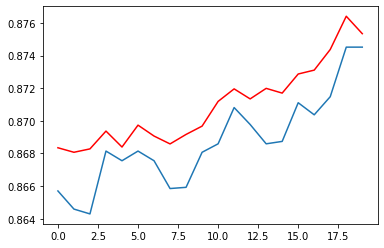

In [103]:
import matplotlib.pyplot as plt
plt.plot(pred_test[100:120],color="r")
plt.plot(y_test[100:120])
#plt.plot(pred_test+0.0085,color='r')
#plt.plot(y_test)
plt.show()

In [105]:
df1 = pd.read_csv("XRPUSDT-8.csv")
df1 = df1.drop('Time',axis=1)
df2 = pd.read_csv("XRPUSDT-1m-2021-09-01.csv")
df2 = df2.drop('Time',axis=1)
df2 = df2/df1.max()
df2

,Open,High,Low,Close,Volume
0,0.879525,0.878370,0.880027,0.876911,0.028381
1,0.876929,0.877111,0.879133,0.877578,0.027291
2,0.877596,0.876593,0.876154,0.874017,0.063545
3,0.873739,0.872667,0.872356,0.871420,0.040442
4,0.871217,0.876222,0.874367,0.877356,0.027348
...,...,...,...,...,...
1435,0.915134,0.914667,0.917635,0.914898,0.015700
1436,0.914540,0.914296,0.917858,0.915269,0.009432
1437,0.915134,0.914815,0.918528,0.915566,0.010208
1438,0.915356,0.916815,0.918454,0.918311,0.030544


In [106]:
X_train.shape

(43916, 50)

In [107]:
dfa = np.array(df2)

In [108]:
for i in range(df2.shape[0]-length):
    dfa[i+length][1] = model.predict(np.array([np.concatenate(dfa[i:length+i])]))[0]

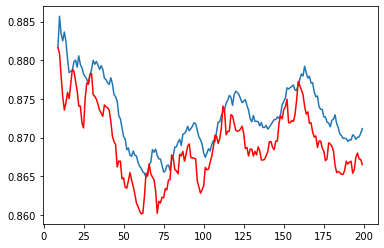

In [110]:
dfk = pd.DataFrame(dfa)
plt.plot(dfk[1][9:200])
plt.plot(df2["High"][9:200],color = "r")
plt.show()